In [1]:
!nvidia-smi

Fri Mar 19 05:42:53 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.56       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!pip install scikit-plot scipy==1.2.0

     |████████████████████████████████| 26.6MB 115kB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1


In [3]:
!unzip msg_gan
!mv msg_gan/* /content/
!python download_dataset.py 

Archive:  msg_gan.zip
   creating: msg_gan/
   creating: msg_gan/data_processing/
  inflating: msg_gan/data_processing/DataLoader.py  
  inflating: msg_gan/data_processing/__init__.py  
   creating: msg_gan/data_processing/__pycache__/
  inflating: msg_gan/data_processing/__pycache__/DataLoader.cpython-37.pyc  
  inflating: msg_gan/data_processing/__pycache__/__init__.cpython-37.pyc  
  inflating: msg_gan/demo.py         
  inflating: msg_gan/download_dataset.py  
  inflating: msg_gan/GAN.py          
  inflating: msg_gan/generate_loss_plots.py  
  inflating: msg_gan/latent_space_interpolation.py  
  inflating: msg_gan/loss.py         
   creating: msg_gan/MSG_GAN/
  inflating: msg_gan/MSG_GAN/CustomLayers.py  
  inflating: msg_gan/MSG_GAN/GAN.py  
  inflating: msg_gan/MSG_GAN/Losses.py  
  inflating: msg_gan/MSG_GAN/utils.py  
  inflating: msg_gan/MSG_GAN/__init__.py  
   creating: msg_gan/MSG_GAN/__pycache__/
  inflating: msg_gan/MSG_GAN/__pycache__/CustomLayers.cpython-37.pyc  
  in

In [89]:
!python train.py --depth=6 \
                  --latent_size=512 \
                  --images_dir=data/ \
                  --sample_dir=samples/bt \
                  --model_dir=models/bt \
                  --num_samples 64 \
                  --num_epochs 1 

Total number of images in the dataset: 3064
Generator Configuration: 
DataParallel(
  (module): Generator(
    (layers): ModuleList(
      (0): GenInitialBlock(
        (conv_1): ConvTranspose2d(512, 512, kernel_size=(4, 4), stride=(1, 1))
        (conv_2): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (lrelu): LeakyReLU(negative_slope=0.2)
      )
      (1): GenGeneralConvBlock(
        (conv_1): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (conv_2): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (lrelu): LeakyReLU(negative_slope=0.2)
      )
      (2): GenGeneralConvBlock(
        (conv_1): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (conv_2): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (lrelu): LeakyReLU(negative_slope=0.2)
      )
      (3): GenGeneralConvBlock(
        (conv_1): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1),

In [58]:
import torch
import torch.nn as nn
from sklearn.model_selection import KFold
from torch.utils.data import Dataset, DataLoader
from torchvision.datasets import ImageFolder
from torchvision import transforms
import torchvision.utils as vutils
from MSG_GAN.GAN import Discriminator
from MSG_GAN.CustomLayers import *
from MSG_GAN.utils import *
import numpy as np
import matplotlib.pyplot as plt
from torch.nn.functional import avg_pool2d

In [59]:
def augmentor(data, image_size=128):
  transform1 = transforms.Compose([
                               transforms.Resize(image_size),
                               transforms.CenterCrop(image_size),
                               transforms.Grayscale(1),
                               transforms.ToTensor(),
                               transforms.Normalize((0.5,), (0.5,)),
                           ])
  
  transform2 = transforms.Compose([
                               transforms.Resize(image_size),
                               transforms.CenterCrop(image_size),
                               transforms.Grayscale(1),
                               transforms.RandomRotation(45),
                               transforms.ToTensor(),
                               transforms.Normalize((0.5,), (0.5,)),
                           ])
  
  transform3 = transforms.Compose([
                               transforms.Resize(image_size),
                               transforms.CenterCrop(image_size),
                               transforms.Grayscale(1),
                               transforms.RandomRotation(90),
                               transforms.ToTensor(),
                               transforms.Normalize((0.5,), (0.5,)),
                           ])
  
  transform4 = transforms.Compose([
                               transforms.Resize(image_size),
                               transforms.CenterCrop(image_size),
                               transforms.Grayscale(1),
                               transforms.RandomRotation(120),
                               transforms.ToTensor(),
                               transforms.Normalize((0.5,), (0.5,)),
                           ])
  
  transform5 = transforms.Compose([
                               transforms.Resize(image_size),
                               transforms.CenterCrop(image_size),
                               transforms.Grayscale(1),
                               transforms.RandomRotation(180),
                               transforms.ToTensor(),
                               transforms.Normalize((0.5,), (0.5,)),
                           ])
  
  transform6 = transforms.Compose([
                               transforms.Resize(image_size),
                               transforms.CenterCrop(image_size),
                               transforms.Grayscale(1),
                               transforms.RandomRotation(240),
                               transforms.ToTensor(),
                               transforms.Normalize((0.5,), (0.5,)),
                           ])
  
  transform7 = transforms.Compose([
                               transforms.Resize(image_size),
                               transforms.CenterCrop(image_size),
                               transforms.Grayscale(1),
                               transforms.RandomRotation(270),
                               transforms.ToTensor(),
                               transforms.Normalize((0.5,), (0.5,)),
                           ])
  
  transform8 = transforms.Compose([
                               transforms.Resize(image_size),
                               transforms.CenterCrop(image_size),
                               transforms.Grayscale(1),
                               transforms.RandomRotation(300),
                               transforms.ToTensor(),
                               transforms.Normalize((0.5,), (0.5,)),
                           ])
  
  transform9 = transforms.Compose([
                               transforms.Resize(image_size),
                               transforms.CenterCrop(image_size),
                               transforms.Grayscale(1),
                               transforms.RandomRotation(330),
                               transforms.ToTensor(),
                               transforms.Normalize((0.5,), (0.5,)),
                           ])
  
  transformers = [transform1, transform2, transform3, transform4, transform5, transform6, transform7, transform8, transform9]
  
  new_imgs = []
  new_labels = []

  for X, y in data:
    for trans in transformers:
      new_imgs.append(trans(X))
      new_labels.append(torch.tensor(y))
  
  return torch.stack(new_imgs), torch.stack(new_labels) 

In [60]:
depth = 6
latent_size = 512
batch_size = 8
n_classes = 3
epochs = 30
lr = 1e-3
gpu_parallelize = True
num_workers = 2
images_dir = 'data'
model_dir = 'models/bt'
samples_dir = 'samples/bt'
model_path = 'models/bt/GAN_DIS_1.pth'
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu') 

In [61]:
# dataset = dset.ImageFolder(root=dataroot,
#                            transform=transforms.Compose([
#                                transforms.Resize(image_size),
#                                transforms.CenterCrop(image_size),
#                                transforms.Grayscale(1),
#                                transforms.ToTensor(),
#                                transforms.Normalize((0.5,), (0.5,)),
#                            ]))


dataset = ImageFolder(root='data')

dataloader = torch.utils.data.DataLoader(
                      dataset,
                      batch_size=8, shuffle=True, collate_fn=augmentor)

# data_source = FoldersDistributedDataset

# dataset = data_source(
#     'data',
#     transform=get_transform((int(np.power(2, depth + 1)),
#                               int(np.power(2, depth + 1)))))

# data = get_data_loader(dataset, batch_size, num_workers)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label: [0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Class:  Glioma Glioma Glioma Glioma Glioma Glioma Glioma Glioma Glioma Pituatary Pituatary Pituatary Pituatary Pituatary Pituatary Pituatary Pituatary Pituatary Glioma Glioma Glioma Glioma Glioma Glioma Glioma Glioma Glioma Glioma Glioma Glioma Glioma Glioma Glioma Glioma Glioma Glioma Menignioma Menignioma Menignioma Menignioma Menignioma Menignioma Menignioma Menignioma Menignioma Glioma Glioma Glioma Glioma Glioma Glioma Glioma Glioma Glioma Glioma Glioma Glioma Glioma Glioma Glioma Glioma Glioma Glioma Glioma Glioma Glioma Glioma Glioma Glioma Glioma Glioma Glioma


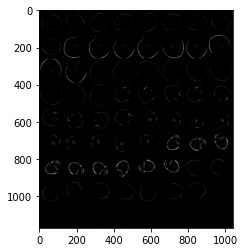

In [62]:
for b, (images, labels) in enumerate(dataloader):
    break

class_names = ['Glioma', 'Menignioma', 'Pituatary']
print('Label:', labels.numpy())
print('Class: ', *np.array([class_names[i] for i in labels]))

# Print the images
im = vutils.make_grid(images, nrow=8)  # the default nrow is 8
plt.figure(figsize=(10,4))
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)));

In [63]:
criterion = nn.CrossEntropyLoss().to(device)

In [64]:
kfold = KFold(n_splits=5, shuffle=True, random_state=101) # to reproduce results, random state is set to 101

In [85]:
n_classes = 3
epochs = 1

FOLD 1


Training the model


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:119: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Epoch:  1  batch:      1 [     1/307]  Loss: 1.094885  Accuracy: 37.500000%
Epoch:  1  batch:     39 [    39/307]  Loss: 1.049145  Accuracy: 48.076923%
Epoch:  1  batch:     77 [    77/307]  Loss: 1.175822  Accuracy: 46.428571%
Epoch:  1  batch:    115 [   115/307]  Loss: 0.956128  Accuracy: 49.770531%
Epoch:  1  batch:    153 [   153/307]  Loss: 0.793791  Accuracy: 52.096950%
Epoch:  1  batch:    191 [   191/307]  Loss: 1.248762  Accuracy: 54.348458%
Epoch:  1  batch:    229 [   229/307]  Loss: 0.798274  Accuracy: 55.355410%
Epoch:  1  batch:    267 [   267/307]  Loss: 0.686745  Accuracy: 55.846858%
Epoch:  1  batch:    305 [   305/307]  Loss: 0.996799  Accuracy: 56.438980%
Epoch 1 | Training Accuracy: 56.274882 | Training Loss: 0.837631
Test Loss: 0.8690
Test accuracy: 58.41%


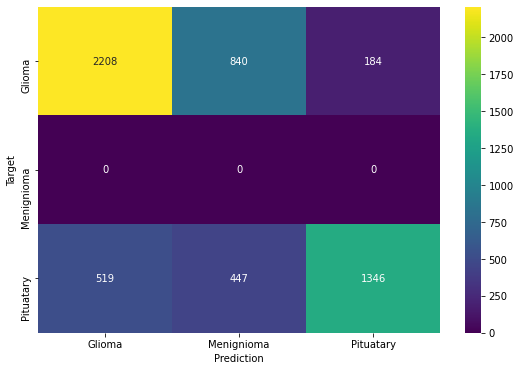


Accuracy Score: 0.6411

Classification Report: 

              precision    recall  f1-score   support

         0.0       0.81      0.68      0.74      3232
         1.0       0.00      0.00      0.00         0
         2.0       0.88      0.58      0.70      2312

    accuracy                           0.64      5544
   macro avg       0.56      0.42      0.48      5544
weighted avg       0.84      0.64      0.72      5544


Jaccard Index (Class-Wise): 
[0.58864303 0.         0.53926282]
Average Jaccard Index: 0.37596861634618234

Precision Score (Class-Wise): 
[0.80968097 0.         0.87973856]
Average Precision Score: 0.5631398433961042

Recall Score (Class-Wise): 
[0.68316832 0.         0.58217993]
Average Recall Score: 0.42178274920917697

F1 Score (Class-Wise): 
[0.74106394 0.         0.70067673]
Average F1: 0.4805802225905012

Finished Training

Training Duration 2.27 minutes
GPU memory used : 403036672 kb
GPU memory cached : 5997854720 kb


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


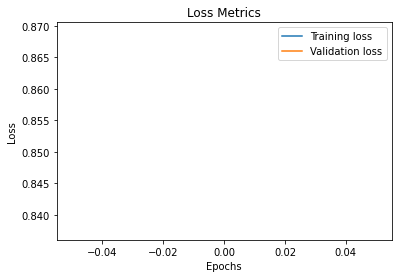

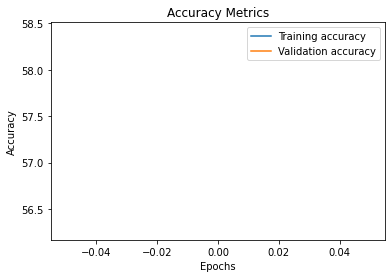

FOLD 2


Training the model
Epoch:  1  batch:      1 [     1/307]  Loss: 1.108101  Accuracy: 25.000000%


KeyboardInterrupt: ignored

In [87]:
for fold, (train_ids, test_ids) in enumerate(kfold.split(dataset)):
    # Print
    print(f'FOLD {fold+1}\n')
    
    model_name = f'MSGGAN_classifier_new_{fold}' 
    
    # Sample elements randomly from a given list of ids, no replacement.
    train_subsampler = torch.utils.data.SubsetRandomSampler(train_ids)
    test_subsampler = torch.utils.data.SubsetRandomSampler(test_ids)
    
    # Define data loaders for training and testing data in this fold
    trainloader = torch.utils.data.DataLoader(
                      dataset, 
                      batch_size=batch_size, sampler=train_subsampler, collate_fn=augmentor)

    testloader = torch.utils.data.DataLoader(
                      dataset,
                      batch_size=batch_size, sampler=test_subsampler, collate_fn=augmentor)
    
    model = Discriminator(depth, latent_size).to(device)
    model = nn.DataParallel(model)
    model.load_state_dict(torch.load(model_path, map_location=device))

    # final_block = nn.Sequential(
    #     MinibatchStdDev(),
        
    #     nn.Linear(model.module.feature_size+1, 1024),
    #     nn.ReLU(True),
    #     nn.Dropout(0.5),

    #     nn.Linear(1024, 1024),
    #     nn.ReLU(True),
    #     nn.Dropout(0.5),

    #     nn.Linear(1024, 3),
    #     nn.Softmax()
    # ).to(device)
    
    # model.module.layers[0] = final_block

    model.module.layers[0].conv_3 = nn.Sequential(nn.Conv2d(512, 3, kernel_size=(1, 1), stride=(1, 1)), nn.Softmax()).to(device)

    for params in model.parameters():
        params.requires_grad = False

    for params in model.module.layers[0].parameters():
        params.requires_grad = True
    
    model = model.to(device)
        
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)

    print('\nTraining the model')
    b, test_b = 0, 0

    training_losses = []
    training_accuracies = []
    test_losses = []
    test_correct = []

    start_time = time.time()

    for epoch in range(epochs):
        e_start = time.time()

        model.train()

        running_loss = 0.0
        running_accuracy = 0.0
        tst_corr = 0.0

        for b, (X_train, y_train) in enumerate(trainloader):
            X_train, y_train = X_train.to(device), y_train.to(device)
            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            X_train = [X_train] + [avg_pool2d(X_train, int(np.power(2, i)))
                                     for i in range(1, depth)]
            X_train = list(reversed(X_train))

            y_pred = model(X_train)
            #print(y_pred)
            y_pred = y_pred.view(-1, n_classes)
            #print(y_pred)

            loss = criterion(y_pred, y_train)

            predicted = torch.argmax(y_pred.data, dim=1).data
            batch_corr = (predicted == y_train).sum()
            running_accuracy += batch_corr
            
            loss.backward()
            
            optimizer.step()
            
            # scheduler.step()
            # print statistics
            running_loss += loss.item()

            if b % int(len(trainloader)/batch_size) == 0:
                print(f'Epoch: {epoch+1:2}  batch: {b+1:6} [{b+1:6}/{len(trainloader)}]  Loss: {loss.item():.6f}  Accuracy: {running_accuracy.item()*100/((batch_size * 9) * (b+1)):.6f}%')
            
        training_losses.append(loss.item())
        training_accuracies.append(running_accuracy.item()*100/((batch_size * 9) * (b+1)))

        print(f"Epoch {epoch+1} | Training Accuracy: {training_accuracies[-1]:.6f} | Training Loss: {training_losses[-1]:.6f}")

        model.eval()
        b = 0

        with torch.no_grad():
            correct = 0
            test_loss = []
            test_corr = []
            labels = []
            pred = []

            new_y = 0.0

            # perform test set evaluation batch wise
            for b, (X, y) in enumerate(testloader):
                b += 1
                # set label to use CUDA if available
                X, y = X.to(device), y.to(device)

                X = [X] + [avg_pool2d(X, int(np.power(2, i)))
                                     for i in range(1, depth)]
                X = list(reversed(X))

                # append original labels            
                if y.shape[0] != (batch_size * 9):
                    blank_values = [torch.Tensor([0.0]) for i in range(((batch_size * 9) - y.shape[0]))]
                    new_y = torch.Tensor([*y, *blank_values])
                    labels.append(new_y.cpu().numpy())
                else:            
                    labels.append(y.cpu().numpy())

                # perform forward pass
                y_val = model(X).view(-1, n_classes)

                # get argmax of predicted values, which is our label
                predicted = torch.argmax(y_val.data, dim=1) 

                if predicted.shape[0] != (batch_size * 9):
                    blank_values = [torch.Tensor([0.0]) for i in range(((batch_size * 9) - predicted.shape[0]))]
                    predicted = torch.Tensor([*predicted, *blank_values])

                # append predicted label
                pred.append(predicted.cpu().numpy())

                # calculate loss
                loss = criterion(y_val, y)

                # increment correct with correcly predicted labels per batch
                if y.shape[0] != batch_size:
                    correct += (predicted == new_y).sum()
                else:
                    correct += (predicted == y).sum()

            # append correct samples labels and losses
            test_corr.append(correct.item()*100/(b*batch_size * 9))
            test_loss.append(loss.item())
                
        print(f"Test Loss: {test_loss[-1]:.4f}")
        print(f'Test accuracy: {test_corr[-1]:.2f}%')

        labels = torch.Tensor(labels)
        pred = torch.Tensor(pred)

        if class_names:
            plot_confusion_matrix(pred, labels, class_names)
        else:
            plot_confusion_matrix(pred, labels)

        get_all_metrics(pred, labels)

        print('Finished Training')

    end_time = time.time() - start_time    

    # print training summary
    print("\nTraining Duration {:.2f} minutes".format(end_time/60))
    print("GPU memory used : {} kb".format(torch.cuda.memory_allocated()))
    print("GPU memory cached : {} kb".format(torch.cuda.memory_reserved()))

    plot_loss(training_losses, test_loss) 
    plot_accuracy(training_accuracies, test_corr) 

    torch.save(model.state_dict(), model_dir + '/' + model_name + f'_fold_{fold}.pt')